# Pregunta 1

Para usar la cuadratura gaussiana se puede usar scipy, con la libreria de integrate y el comando de quad. Los parametros de input que recibe son:
- ``func``: Debe ser una función o método en Python que se va a integrar
- ``a`` y ``b``: Deben ser números de tipo float o int, y representan los limites inferior y superior respectivamente

y otros opcionales como ``args``, ``full_output`` y ``complex_func``


La definicion que la función debe ser de una sola variable real, evaluable en el rango y puede ser definida con def o lambda, y la condición de salida utiliza el algoritmo de cuadratura adaptativa, que divide el intervalo en subintervalos. También como output da el error.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html


# Pregunta 2

In [48]:
import numpy as np
from scipy.integrate import quad

def f(x):
    return np.sin(x)

resultado, error = quad(f, 0, np.pi)
print(resultado)  # Debería aproximarse a 2
print(error)

2.0
2.220446049250313e-14


# Pregunta 3
$$\int_{-1}^{1}2x^{4}-3x^{3}+x-5dx$$


## Analitico
$$
\int_{-1}^{1}2x^{4}-3x^{3}+x-5dx= \Bigg[\frac{2x^{5}}{5}-\frac{3x^{4}}{4}+\frac{x^{2}}{2}-5x \Bigg] _{-1}^{1}=\boxed{-\frac{46}{5}}=-9.2\\
$$


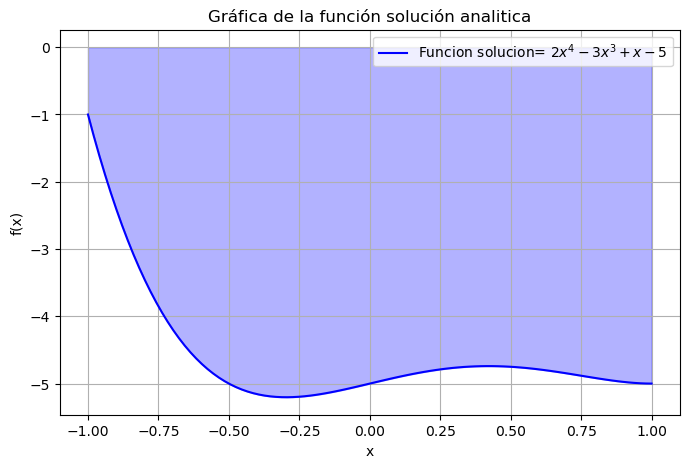

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Función para graficar
def f(x):
    return 2*x**4 - 3*x**3 + x - 5
# Valores para graficar
x = np.linspace(-1, 1, 100)
y = f(x)

# Crear la gráfica
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=r'Funcion solucion= $2x^{4}-3x^{3}+x-5$', color='b')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gráfica de la función solución analitica")
plt.legend()
plt.grid()

# Agregar sombreado desde -1 hasta la función
plt.fill_between(x, 0, y, where=(x >= -1), color='blue', alpha=0.3)


## Con Cuadratura Gaussiana


In [13]:
import numpy as np
from scipy.integrate import quad

# Función a integrar
def f(x):
    return 2*x**4 - 3*x**3 + x - 5

# Usar cuadratura de Gauss
result, error = quad(f, -1, 1) 
print(f"Integral aproximada: {result:.6f}")
print(f"Error estimado: {error:.6f}")

Integral aproximada: -9.200000
Error estimado: 0.000000


## Con Simpson

In [19]:
import numpy as np
from scipy.integrate import simpson

# Función a integrar
def f(x):
    return 2*x**4 - 3*x**3 + x - 5

# Definir x, y
x = np.linspace(-1, 1,1000)  
y = f(x)

# Usar regla de Simpson
result = simpson(y, x=x)
print(f"Integral Aproximada: {result:.10f}")

Integral Aproximada: -9.2000000000


# Pregunta 4
$$\int_{-1}^{1} 5x e^{-2x} dx$$

## Analítico
$$
\begin{aligned}
\int_{-1}^{1} 5x e^{-2x} dx &= -\frac{5}{2} \left( \left. \frac{3x}{2} e^{-2x} + \frac{1}{2} e^{-2x} \right|_{-1}^{1} \right)\\

&= -\frac{5}{2} \left( \frac{3}{2} e^{-2} + \frac{1}{2} e^2 \right) \approx \boxed{-9.744}
\end{aligned}
$$

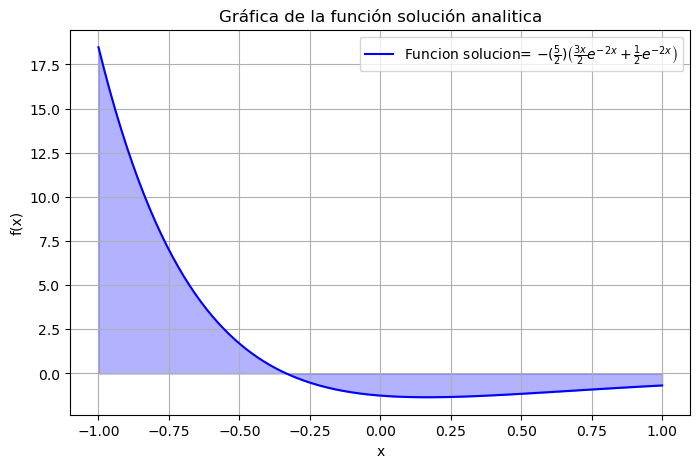

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Función para graficar
def solution_function(x):
    return -(5/2) * ((3*x/2) * np.exp(-2*x) + (1/2) * np.exp(-2*x))

# Valores para graficar
x_vals = np.linspace(-1, 1, 100)
y_vals = solution_function(x_vals)

# Crear la gráfica
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label=r'Funcion solucion= $-(\frac{5}{2}) \left( \frac{3x}{2}e^{-2x} + \frac{1}{2}e^{-2x} \right)$', color='b')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gráfica de la función solución analitica")
plt.legend()
plt.grid()

# Agregar sombreado desde -1 hasta la función
plt.fill_between(x_vals, 0, y_vals, where=(x_vals >= -1), color='blue', alpha=0.3)


## Cuadratura Gaussiana

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

func = lambda x: 5*x*np.exp(-2*x)
gauss_legendre_result, _ = quad(func, -1, 1)
print(f"Integral usando cuadratura de Gauss-Legendre: {gauss_legendre_result}")

Integral usando cuadratura de Gauss-Legendre: -9.743827435800611


## Con Simpson

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson 

x_simpson = np.linspace(-1, 1, 100)
y_simpson = func(x_simpson)
simpson_result = simpson(y_simpson, x=x_simpson)
print(f"Integral usando la regla de Simpson: {simpson_result}")

Integral usando la regla de Simpson: -9.74382809650907


# Pregunta 5

Usando scipy.integrate.simpson, la input debe tener un array y de valores numéricos que representan las evaluaciones en puntos específicos, x (opcional), que es un array de coordenadas con los puntos que se evaluó y, dx es el espaciado constante y axis permite indicar si y es multidimensional.

A diferencia de quad, simpson no recibe una función directamente, por lo que primero se deben crear los valores de y tomando en cuenta la función, y evaluar en x y la condición de salida usa la fórmula de la regla de simpson

$$\int_a^b f(x)dx \approx \frac{h}{3} \left[ f(x_0) + 4f(x_1) + 2f(x_2) + 4f(x_3) + \dots + 2f(x_{n-2}) + 4f(x_{n-1}) + f(x_n) \right] $$

 aunque se puede tambien definir la función y evaluarlos posteriormente

# Pregunta 6

In [50]:
import numpy as np
from scipy.integrate import simpson

x = np.linspace(0, np.pi, 100)  # 100 puntos entre 0 y π
y = np.sin(x)  #la funcion sin

resultado = simpson(y, x=x)
print(resultado)  # Aproximadamente 2

2.0000000534993037


In [51]:
import numpy as np
from scipy.integrate import simpson

x = np.linspace(0, np.pi, 100000)  # 100 puntos entre 0 y π
y = np.sin(x)  #la funcion sin

resultado = simpson(y, x=x)
print(resultado)  # Aproximadamente 2

2.0000000000000004


Sin usar paquetes mas que ``numpy``

In [61]:
import numpy as np

def integrate(func, a, b,h):
    n=(b-a)/h
    f=[]
    f.append(func(a))
    for i in range(1,int(n)):
        if i%2 == 1:
            f.append(4*func(a+i*h))
        else:
            f.append(2*func(a+i*h))        
    f.append(func(b))
    I=h/3*np.sum(f)
    return I

# Ejemplo de uso
def main():
    f = lambda x: np.sin(x)  # Función de ejemplo
    a, b = 0, np.pi  # Límites de integración
    h = 0.0001  # Step
    result = integrate(f, a, b, h)
    print(f"Integral aproximada: {result}")

main()

Integral aproximada: 1.9999999878640833


# Pregunta 7

## Analítico

## Cuadratura Gaussiana

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

func = lambda x: np.sqrt(1 - x**2)
gauss_legendre_result, _ = quad(func, 0, 1)
gauss_legendre_result=4*gauss_legendre_result
print(f"Integral usando cuadratura de Gauss-Legendre: {gauss_legendre_result}")

Integral usando cuadratura de Gauss-Legendre: 3.1415926535897922


## Simpson

In [44]:
import numpy as np
from scipy.integrate import simpson
n = 1000
x = np.linspace(0, 1, n)
y = np.sqrt(1 - x**2)
cuarto = simpson(y, x=x)
circ= 4 * cuarto
print(f"Área aproximada del circulo {circ}")

Área aproximada del circulo 3.141571313867939


# Pregunta 8

$$ 
\int_{-1}^{1}\cosh(x)dx
$$

## Analítico

$$
\int_{-1}^{1}\cosh(x)dx=\sinh(x)\Big|_{-1}^{1}=2\sinh{(1)}\approx\boxed{2.3504}
$$

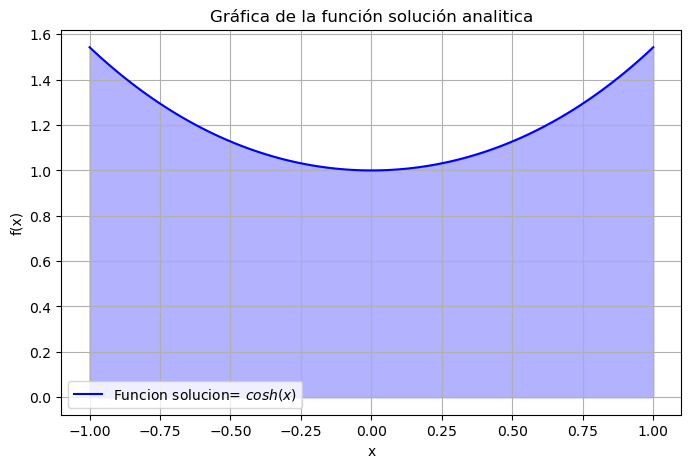

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Función para graficar
def f(x):
    return np.cosh(x)
# Valores para graficar
x = np.linspace(-1, 1, 100)
y = f(x)

# Crear la gráfica
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=r'Funcion solucion= $cosh(x)$', color='b')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gráfica de la función solución analitica")
plt.legend()
plt.grid()

# Agregar sombreado desde -1 hasta la función
plt.fill_between(x, 0, y, where=(x >= -1), color='blue', alpha=0.3)

## Cuadratura Gaussiana

In [ ]:
import numpy as np
from scipy.integrate import quad

# Función a integrar
def f(x):
    return np.cosh(x)

# Usar cuadratura de Gauss
result, error = quad(f, -1, 1) 
print(f"Integral aproximada: {result:.6f}")
print(f"Error estimado: {error:.6f}")

Integral aproximada: -9.200000
Error estimado: 0.000000


## Con Simpson

In [ ]:
import numpy as np
from scipy.integrate import simpson

# Función a integrar
def f(x):
    return 2*x**4 - 3*x**3 + x - 5

# Definir x, y
x = np.linspace(-1, 1,1000)  
y = f(x)

# Usar regla de Simpson
result = simpson(y, x=x)
print(f"Integral Aproximada: {result:.10f}")

Integral Aproximada: -9.2000000000


# Pregunta 9

$$\int_{-4\pi}^{4\pi} \frac{\sin(x)}{x} dx$$

## Analítico

$$\int_{-4\pi}^{4\pi} \frac{\sin(x)}{x} dx=\int_{-4\pi}^{0}\frac{\sin(x)}{x}dx+\int_{0}^{4\pi}\frac{\sin(x)}{x}dx=-Si(-4\pi)+Si(4\pi)$$

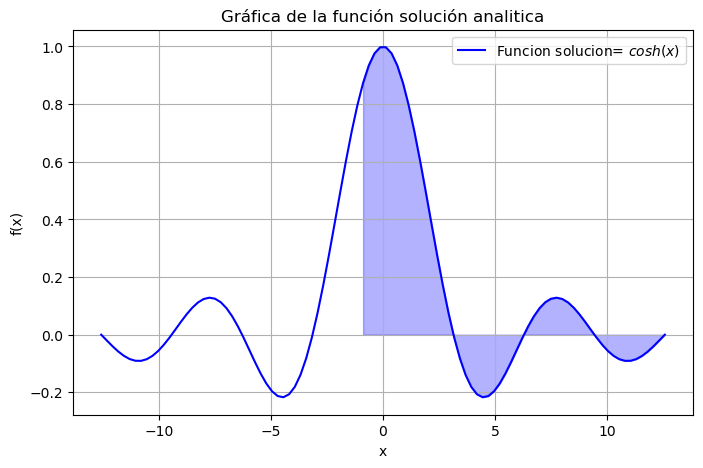

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Función para graficar
def f(x):
    return np.sin(x)/x if x != 0 else 1
# Valores para graficar
x = np.linspace(-4*np.pi, 4*np.pi, 100)
y = np.array([f(val) for val in x])

# Crear la gráfica
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=r'Funcion solucion= $cosh(x)$', color='b')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gráfica de la función solución analitica")
plt.legend()
plt.grid()

# Agregar sombreado desde -1 hasta la función
plt.fill_between(x, 0, y, where=(x >= -1), color='blue', alpha=0.3)

## Gauss

In [57]:
import numpy as np
from scipy.integrate import quad

# Función a integrar
def f(x):
    return np.sin(x)/x if x != 0 else 1

# Usar cuadratura de Gauss
result, error = quad(f, -4*np.pi, 4*np.pi) 
print(f"Integral aproximada: {result:.6f}")
print(f"Error estimado: {error:.6f}")

Integral aproximada: 2.984322
Error estimado: 0.000000


## Simpson

In [58]:
import numpy as np
from scipy.integrate import simpson
n = 1000
x = np.linspace(-4*np.pi, 4*np.pi, n)
y = np.sin(x)/x
res = simpson(y, x=x)
print(f"Área aproximada {res}")

Área aproximada 2.984322449540523
